<center><h1>Analyse de QuickSort</h1></center>

Dans ce document nous analyser les résultats de l'algorithme Quicksort afin de déterminer les conditions dans lesquelles l'algorithme est le plus performant.

## Analyse théorique 

Avant d'analyser le résultat de nos expérimentations sur cet algorithme, nous allons étudier la complexité du QuickSort.

    Algorithme QuickSort :
    
    fonction partitionner(tableau T, entier premier, entier dernier, entier pivot):
        échanger(T[pivot], T[dernier])
        j = premier
        pour i de premier à dernier - 1 :
            si T[i] <= T[dernier] alors
                échanger(T[i],T[j])
                j = j + 1
        échanger(T[dernier],T[j])
        renvoyer j

    fonction tri_rapide(tableau T, entier premier, entier dernier):
        si premier < dernier alors
            pivot = dernier//2
            pivot = partitionner(T, premier, dernier, pivot)
            tri_rapide(T, premier, pivot-1)
            tri_rapide(T, pivot+1, dernier)
    
Source : Wikipedia

La fonction tri_rapide utilise la fonction partitionner. On peut donc commencer par analyser celle-ci.

La fonction partitionner réalise une seule boucle de taille n où n est la différence entre le premier et le dernier donc son nombre d'opération sera de l'ordre de O(n). Avec un nombre d'échanges allant de 2 à n+2.

La fonction tri_rapide est quant à elle une fonction de type diviser pour régner. Sa complexité repose en partie sur le choix du pivot.

Si le choix du pivot est le meilleur à chaque fois, c'est à dire qu'il coupe le tableau en deux tableaux de longeurs égals sa complexité serait de l'ordre de O(nlog(n)).

Puisque on peut écrire la complexité de cet algorithme, nommé ici T(n) où n est la taille du tableau, ainsi :
    
$$T(n) = 2T(\frac{n}{2})+ T(n)$$

Or, si on fait $$\log_2(2)= 1$$  qui est égal au degré de n dans la complexité de notre algorithme alors d'après le master theorem notre algorithme est de complexité O(nlog(n)).

Si l'on choisit le pire pivot, par exemple le dernier nombre dans un tableau déjà trié la complexité sera maximum car l'agorithme s'éxécutera sur un tableau de taille 0 et un tableau de taille n-1 à chaque fois jusqu'à atteindre 0. Ce qui fait une somme de tous les nombres de n jusqu'à 0, qui vaut :

$$\frac{n(n-1)}{2}$$

Donc le pire des cas est de l'odre de O(n^2).




## Analyse des résultats de QuickSort

Dans cette partie nous allons analyser l'efficacité constatée de l'algorithme QuickSort.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy import odr
import time

### Tri de int

On importe dans la cellule suivante les données et on nomme les colonnes.

In [2]:
data = pd.read_csv('result_data/QuickSort.csv',sep=',')# On récupère les données correspondantes
print("Fichier lu")

data.columns = ["NumberElements","NombreEchangeRd",
                     "NombreComparaisonRd","TempsMSRd","NombreEchange1_2",
                     "NombreComparaison1_2","TempsMS1_2","NombreEchangeStart25",
                     "NombreComparaisonStart25","TempsMSStart25",
                     "NombreEchangeStart50","NombreComparaisonStart50",
                     "TempsMSStart50","NombreEchangeEnd25",
                     "NombreComparaisonEnd25","TempsMSEnd25",
                     "NombreEchangeEnd50","NombreComparaisonEnd50",
                     "TempsMSEnd50","NombreEchangeSorted",
                     "NombreComparaisonSorted","TempsMSSorted"]

Fichier lu


#### En particulier

On va comparer les temps d'exécution, le nombre de comparaisons, d'échanges, pour un grand nombre n afin de voir s'il y a un cas de désordre désavantageux.

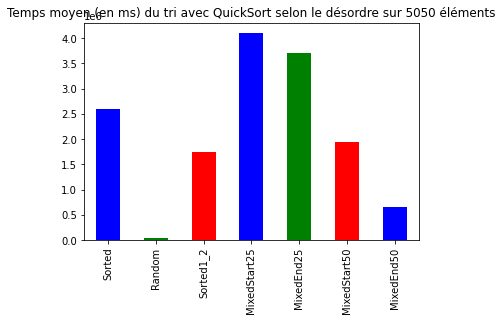

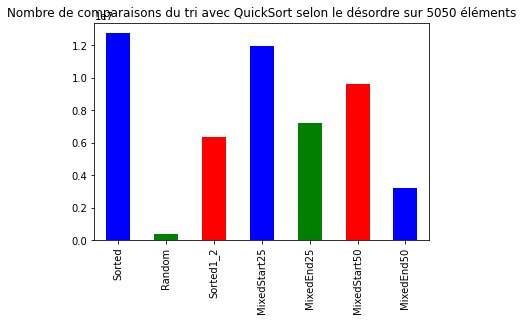

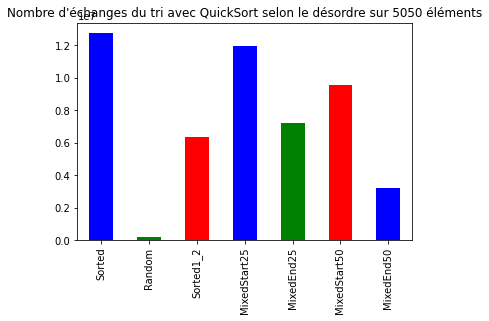

In [3]:
NomAlgorithme = "QuickSort"
n = 5050
vitesseDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'TempsMSSorted'],
    'Random' : data.loc[:,'TempsMSRd'],
    'Sorted1_2': data.loc[:,'TempsMS1_2'],
    'MixedStart25': data.loc[:,'TempsMSStart25'],
    'MixedEnd25': data.loc[:,'TempsMSEnd25'],
    'MixedStart50': data.loc[:,'TempsMSStart50'],
    'MixedEnd50': data.loc[:,'TempsMSEnd50']
})

echangesDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'NombreEchangeSorted'],
    'Random' : data.loc[:,'NombreEchangeRd'],
    'Sorted1_2': data.loc[:,'NombreEchange1_2'],
    'MixedStart25': data.loc[:,'NombreEchangeStart25'],
    'MixedEnd25': data.loc[:,'NombreEchangeEnd25'],
    'MixedStart50': data.loc[:,'NombreEchangeStart50'],
    'MixedEnd50': data.loc[:,'NombreEchangeEnd50']
})

comparaisonsDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'NombreComparaisonSorted'],
    'Random' : data.loc[:,'NombreComparaisonRd'],
    'Sorted1_2': data.loc[:,'NombreComparaison1_2'],
    'MixedStart25': data.loc[:,'NombreComparaisonStart25'],
    'MixedEnd25': data.loc[:,'NombreComparaisonEnd25'],
    'MixedStart50': data.loc[:,'NombreComparaisonStart50'],
    'MixedEnd50': data.loc[:,'NombreComparaisonEnd50']
})

finalCmpDF = pd.DataFrame({
    'Comparaisons': comparaisonsDF.loc[n,vitesseDF.columns != 'Elements']
})
finalTimeDF = pd.DataFrame({
    'Temps': vitesseDF.loc[n,vitesseDF.columns != 'Elements']
})
finalExDF = pd.DataFrame({
    'Echanges': echangesDF.loc[n,echangesDF.columns != 'Elements']
})

plt.figure()

finalTimeDF['Temps'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Temps moyen (en ms) du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

finalCmpDF['Comparaisons'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre de comparaisons du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

finalExDF['Echanges'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre d'échanges du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

Ici, on observe qu'en moyenne l'algorithme GnomeSort n'est pas plus efficace si le désordre et au début ou à la fin dans la mesure où le nombre d'échanges et de comparaisons pour End25 et Start25 sont similaires.
De plus l'algorithme est très efficace lorsque le tableau est mélangé une fois sur deux, puisqu'il n'a qu'à faire un échange par élément désordonné. Contrairement à la situation où tout le tableau est désordonné.

#### Comportement par rapport aux quantités de données

Dans cette partie, nous allons observer comment le temps d'exécution évolue si l'on augmente la taille de l'échantillon à trier toujours selon le désordre.

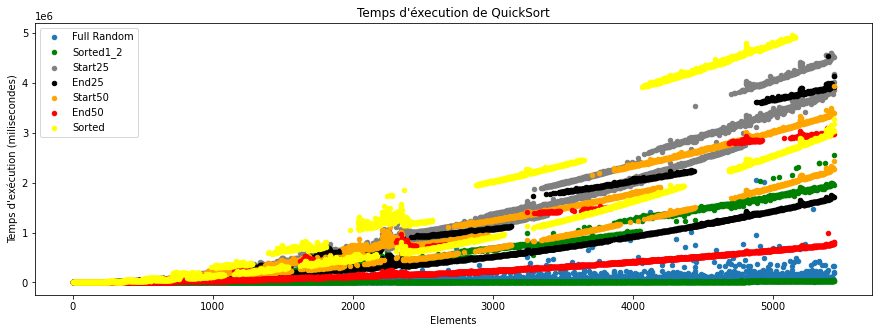

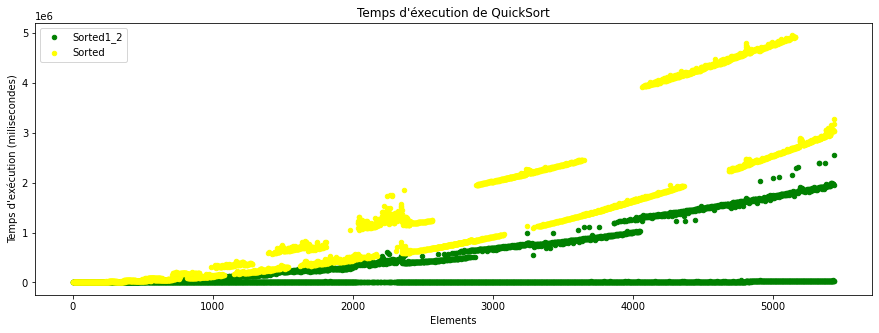

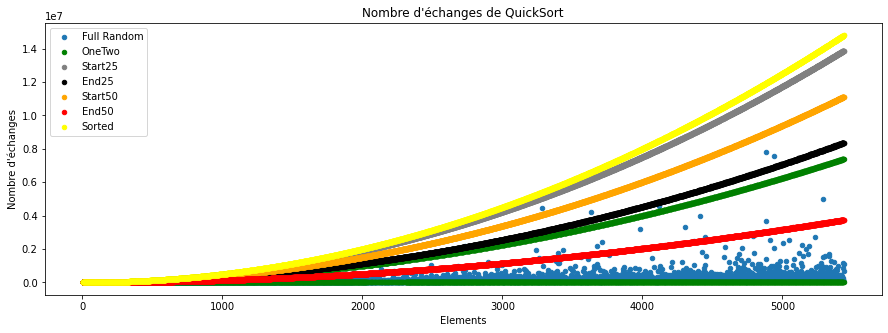

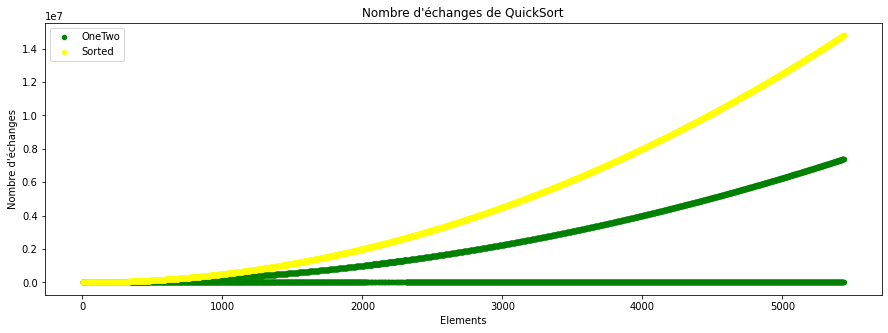

In [4]:
# solution trouvée sur https://stackoverflow.com/questions/13872533/how-to-plot-different-groups-of-data-from-a-dataframe-into-a-single-figure

fig = vitesseDF.plot.scatter(x = 'Elements', y = "Random",label = "Full Random",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
vitesseDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "Sorted1_2", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedStart25',c = 'grey',label = "Start25", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedEnd25',c = 'black',label = "End25", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedStart50',c = 'orange',label = "Start50", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedEnd50',c = 'r',label = "End50", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Temps d'éxecution de "+ NomAlgorithme)
fig.set_ylabel("Temps d'exécution (milisecondes)")
plt.legend(loc = 0)
plt.show()


fig = vitesseDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "Sorted1_2",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
vitesseDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Temps d'éxecution de "+ NomAlgorithme)
fig.set_ylabel("Temps d'exécution (milisecondes)")
plt.legend(loc = 0)
plt.show()

fig = echangesDF.plot.scatter(x = 'Elements', y = "Random",label = "Full Random",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
echangesDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "OneTwo", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedStart25',c = 'grey',label = "Start25", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedEnd25',c = 'black',label = "End25", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedStart50',c = 'orange',label = "Start50", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedEnd50',c = 'r',label = "End50", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Nombre d'échanges de "+ NomAlgorithme)
fig.set_ylabel("Nombre d'échanges")
plt.legend(loc = 0)
plt.show()

fig = echangesDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "OneTwo", figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
echangesDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Nombre d'échanges de "+ NomAlgorithme)
fig.set_ylabel("Nombre d'échanges")
plt.legend(loc = 0)
plt.show()

In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.polynomial.html
# L'idée est ici de se représenter sous forme de fonction l'écart approximatif
# entre chacun de nos résultats pour une même taille de donnée

poly_model = odr.polynomial(2)

dataRandom = odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSRd'])
odr_obj_rd = odr.ODR(dataRandom, poly_model)
output_rd = odr_obj_rd.run()

dataSorted= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSSorted'])
odr_obj_sorted = odr.ODR(dataSorted, poly_model)
output_sorted = odr_obj_sorted.run()

dataEnd50= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSEnd50'])
odr_obj_end50 = odr.ODR(dataEnd50, poly_model)
output_end50 = odr_obj_end50.run()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : \n""")
print("f(n) = n*",output_sorted.beta[1]," + n² *",output_sorted.beta[2])
print()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_rd.beta[1]," + n² *",output_rd.beta[2])
print()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_end50.beta[1]," + n² *",output_end50.beta[2])
print()


Fonction d'approximation du temps d'exécution du QuickSort
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : 

f(n) = n* -100.39620258177558  + n² * 0.1830409341958518

Fonction d'approximation du temps d'exécution du QuickSort
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: 

f(n) = n* -32.96368478841477  + n² * 0.013449878120556783

Fonction d'approximation du temps d'exécution du QuickSort
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: 

f(n) = n* -99.10424539232349  + n² * 0.07199888753284854



In [6]:
dataRandom = odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeRd'])
odr_obj_rd = odr.ODR(dataRandom, poly_model)
output_rd = odr_obj_rd.run()

dataSorted= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeSorted'])
odr_obj_sorted = odr.ODR(dataSorted, poly_model)
output_sorted = odr_obj_sorted.run()

dataEnd50= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeEnd50'])
odr_obj_end50 = odr.ODR(dataEnd50, poly_model)
output_end50 = odr_obj_end50.run()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : \n""")
print("f(n) = n*",output_sorted.beta[1]," + n² *",output_sorted.beta[2])
print()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_rd.beta[1]," + n² *",output_rd.beta[2])
print()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_end50.beta[1]," + n² *",output_end50.beta[2])
print()


Fonction d'approximation du nombre d'échanges du QuickSort
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : 

f(n) = n* 0.49992025592774636  + n² * 0.5000000073612848

Fonction d'approximation du nombre d'échanges du QuickSort
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: 

f(n) = n* -35.3559483883476  + n² * 0.030471558045274127

Fonction d'approximation du nombre d'échanges du QuickSort
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: 

f(n) = n* 6.099908320484916  + n² * 0.12543329976414763



## Bilan

Après avoir analysé l'algorithme QuickSort dans chacune des situations que nous avons expérimentées, nous proposons d'observer un diagramme en boîte nous permettant de déterminer quel est le pire cas d'utilisation et le meilleur cas d'utilisation de l'algorithme.

                Temps
Sorted        2595433
Random          52726
Sorted1_2     1750880
MixedStart25  4098098
MixedEnd25    3699193
MixedStart50  1938550
MixedEnd50     658548


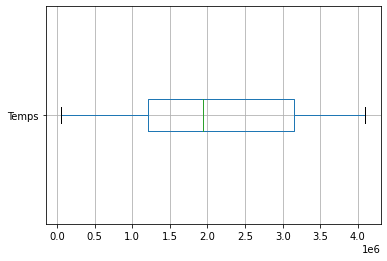

La meilleure des situations pour QuickSort est lorsqu'il tri un tableau mélangé avec l'algorithme Random de mélange.
La pire des situations pour QuickSort est lorsqu'il tri le tableau mélangé avec l'algorithme MixedStart25 de mélange.
              Echanges
Sorted        12763877
Random          202964
Sorted1_2      6380676
MixedStart25  11974166
MixedEnd25     7214703
MixedStart50   9589620
MixedEnd50     3233097


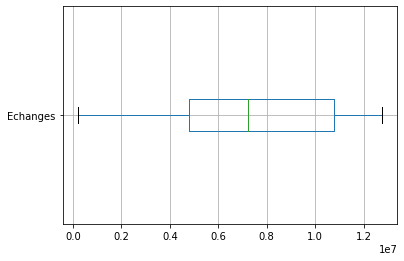

              Comparaisons
Sorted            12758826
Random              368281
Sorted1_2          6380676
MixedStart25      11976788
MixedEnd25         7218018
MixedStart50       9601110
MixedEnd50         3244683


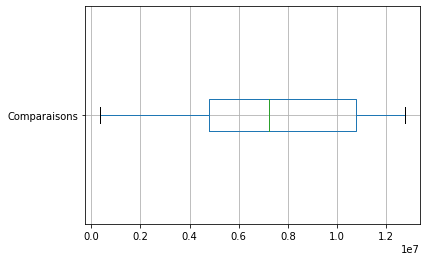

In [7]:
def findMaxRowColumnName(df):
    maximumRowsName = df.idxmax()
    return maximumRowsName

def findMinRowColumnName(df):
    minimumRowsName = df.idxmin()
    return minimumRowsName
minimum = findMinRowColumnName(finalTimeDF)
maximum = findMaxRowColumnName(finalTimeDF)

finalTimeDF.boxplot(vert = False)
print(finalTimeDF)
plt.show()

print("La meilleure des situations pour " + NomAlgorithme +
      " est lorsqu'il tri un tableau mélangé avec l'algorithme", minimum[0],"de mélange.")
print("La pire des situations pour " + NomAlgorithme + " est lorsqu'il tri le tableau mélangé avec l'algorithme", maximum[0],"de mélange.")

finalExDF.boxplot(vert = False)
print(finalExDF)
plt.show()
finalCmpDF.boxplot(vert = False)
print(finalCmpDF)

Pour conclure, nous pouvons dire que l'algorithme QuickSort est au maximum de son efficacité lorsque le tableau a un désordre de type :  random.

Cependant, l'algorithme prend un temps conséquent sur des données avec seulement 1/2 des éléments triés et sur un tableau déjà trié.

La meilleure situation pour utiliser le QuickSort est lorsque l'échantillon de données est totalement randomisé, la pire des situations est lorsque le tableau est déjà trié.